# Мастерская данных

В данном проекте я разработал модель для предсказания риска сердечного приступа на основе полученных данных о пациентах. 
    
    Описание данных:  


- `id` - Уникальный идентификатор пациента
- `Age`- Возраст
- `Cholesterol` - Уровень холестерина
- `Heart rate` - Частота сердечных сокращений
- `Diabetes` - Диабет
- `Family History`- Семейный анамнез
- `Smoking` - Курение
- `Obesity` - Ожирение
- `Alcohol Consumption` - Употребление алкоголя
- `Exercise Hours Per Week` - Количество часов физических упражнений в неделю
- `Diet` — Диета
- `Previous Heart Problems` — Предыдущие проблемы с сердцем
- `Medication Use` — Прием лекарств
- `Stress Level` — Уровень стресса
- `Sedentary Hours Per Day` — Количество часов сидячего образа жизни в день
- `Income` — Доход
- `BMI` — ИМТ (Индекс массы тела)
- `Triglycerides` — Триглицериды
- `Physical Activity Days Per Week` — Физическая активность (дней в неделе)
- `Sleep Hours Per Day` — Количество часов сна в день
- `Heart Attack Risk (Binary)` — Риск сердечного приступа (двоичный), целевой признак
- `Blood sugar` — Уровень сахара в крови
- `CK-MB` — Креатинкиназа MB
- `Troponin` — Тропонин
- `Gender` — Пол
- `Systolic blood pressure` — Систолическое артериальное давление
- `Diastolic blood pressure` — Диастолическое артериальное давление

## Загрузка пакетов:

In [4]:
!pip install phik -q
!pip install catboost -q

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import phik
from scipy.stats import loguniform
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score,\
classification_report, make_scorer, fbeta_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import FunctionTransformer

In [6]:
RANDOM_STATE = 1202

## Загрузка данных

In [8]:
# Загрузка тренировочной выборки
train_data = pd.read_csv('/Users/gadzhi/Desktop/Python_SQL/heart_train.csv')

# Загрузка тестовой выборки
test_data = pd.read_csv('/Users/gadzhi/Desktop/Python_SQL/heart_test.csv')

In [9]:
data = [train_data, test_data]

In [10]:
data_names = ['train_data', 'test_data']

In [11]:
for df, name in zip(data, data_names):
    print(f"Данные из датафрейма '{name}':")
    display(df.head())
    print(df.info())

Данные из датафрейма 'train_data':


,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.359551,0.732143,0.074244,1.0,1.0,1.0,1.0,1.0,0.535505,...,3.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.212903,0.709302,2664
1,1,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,...,3.0,0.833333,0.0,0.150198,0.017616,0.000194,Female,0.412903,0.569767,9287
2,2,0.606742,0.860714,0.055912,1.0,0.0,1.0,1.0,1.0,0.944001,...,2.0,1.000000,0.0,0.227018,0.048229,0.036512,Female,0.238710,0.220930,5379
3,3,0.730337,0.007143,0.053162,0.0,0.0,1.0,0.0,1.0,0.697023,...,0.0,0.333333,1.0,0.227018,0.048229,0.036512,Female,0.348387,0.267442,8222
4,4,0.775281,0.757143,0.021998,0.0,0.0,1.0,0.0,1.0,0.412878,...,5.0,1.000000,1.0,0.227018,0.048229,0.036512,Male,0.619355,0.441860,4047


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Problems          8442 non-null   float64
 12  Medication Use      

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.494382,0.264286,0.062328,0.0,1.0,1.0,1.0,1.0,0.361618,...,0.306494,1.0,0.333333,0.227018,0.048229,0.036512,Male,0.283871,0.372093,7746
1,1,0.224719,0.953571,0.082493,1.0,0.0,0.0,1.0,0.0,0.996483,...,0.087013,0.0,0.166667,0.227018,0.048229,0.036512,Female,0.703226,0.441860,4202
2,2,0.629213,0.092857,0.064161,0.0,1.0,1.0,1.0,0.0,0.995561,...,0.205195,7.0,1.000000,0.102767,0.002666,0.088455,Male,0.458065,0.779070,6632
3,3,0.460674,0.567857,0.055912,1.0,1.0,1.0,1.0,1.0,0.437277,...,0.163636,0.0,0.666667,0.203557,0.056390,0.271774,Female,0.741935,0.255814,4639
4,4,0.719101,0.485714,0.022915,1.0,0.0,1.0,0.0,1.0,0.514920,...,0.580519,5.0,0.000000,0.227018,0.048229,0.036512,Male,0.412903,0.395349,4825


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       966 non-null    int64  
 1   Age                              966 non-null    float64
 2   Cholesterol                      966 non-null    float64
 3   Heart rate                       966 non-null    float64
 4   Diabetes                         935 non-null    float64
 5   Family History                   935 non-null    float64
 6   Smoking                          935 non-null    float64
 7   Obesity                          935 non-null    float64
 8   Alcohol Consumption              935 non-null    float64
 9   Exercise Hours Per Week          966 non-null    float64
 10  Diet                             966 non-null    int64  
 11  Previous Heart Problems          935 non-null    float64
 12  Medication Use        

In [12]:
train_data = train_data.rename(columns={
    'Age': 'age',
    'Cholesterol':'cholesterol',
    'Heart rate':'heart_rate',
    'Diabetes':'diabetes',
    'Family History':'family_history',
    'Smoking':'smoking',
    'Obesity':'obesity',
    'Alcohol Consumption':'alc_consump',
    'Exercise Hours Per Week':'exercise_hours',
    'Diet':'diet',
    'Previous Heart Problems':'previous_problems',
    'Medication Use':'medication_use',
    'Stress Level':'stress_level',
    'Sedentary Hours Per Day':'sedentary_hours',
    'Income':'income',
    'BMI':'bmi',
    'Triglycerides':'triglycerides',
    'Physical Activity Days Per Week':'phys_activity_days',
    'Sleep Hours Per Day':'sleep_hours',
    'Blood sugar':'blood_sugar',
    'CK-MB':'ck-mb',
    'Troponin':'troponin',
    'Gender':'gender',
    'Systolic blood pressure':'systolic_pressure',
    'Diastolic blood pressure':'diastolic_pressure',
    'Heart Attack Risk (Binary)':'heart_attack_risk'
})

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8685 non-null   int64  
 1   age                 8685 non-null   float64
 2   cholesterol         8685 non-null   float64
 3   heart_rate          8685 non-null   float64
 4   diabetes            8442 non-null   float64
 5   family_history      8442 non-null   float64
 6   smoking             8442 non-null   float64
 7   obesity             8442 non-null   float64
 8   alc_consump         8442 non-null   float64
 9   exercise_hours      8685 non-null   float64
 10  diet                8685 non-null   int64  
 11  previous_problems   8442 non-null   float64
 12  medication_use      8442 non-null   float64
 13  stress_level        8442 non-null   float64
 14  sedentary_hours     8685 non-null   float64
 15  income              8685 non-null   float64
 16  bmi   

In [14]:
test_data = test_data.drop(columns=['Unnamed: 0', 'Previous Heart Problems'])

In [15]:
test_data = test_data.rename(columns={
    'Age': 'age',
    'Cholesterol':'cholesterol',
    'Heart rate':'heart_rate',
    'Diabetes':'diabetes',
    'Family History':'family_history',
    'Smoking':'smoking',
    'Obesity':'obesity',
    'Alcohol Consumption':'alc_consump',
    'Exercise Hours Per Week':'exercise_hours',
    'Diet':'diet',
    'Medication Use':'medication_use',
    'Stress Level':'stress_level',
    'Sedentary Hours Per Day':'sedentary_hours',
    'Income':'income',
    'BMI':'bmi',
    'Triglycerides':'triglycerides',
    'Physical Activity Days Per Week':'phys_activity_days',
    'Sleep Hours Per Day':'sleep_hours',
    'Blood sugar':'blood_sugar',
    'CK-MB':'ck-mb',
    'Troponin':'troponin',
    'Gender':'gender',
    'Systolic blood pressure':'systolic_pressure',
    'Diastolic blood pressure':'diastolic_pressure'
})

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 966 non-null    float64
 1   cholesterol         966 non-null    float64
 2   heart_rate          966 non-null    float64
 3   diabetes            935 non-null    float64
 4   family_history      935 non-null    float64
 5   smoking             935 non-null    float64
 6   obesity             935 non-null    float64
 7   alc_consump         935 non-null    float64
 8   exercise_hours      966 non-null    float64
 9   diet                966 non-null    int64  
 10  medication_use      935 non-null    float64
 11  stress_level        935 non-null    float64
 12  sedentary_hours     966 non-null    float64
 13  income              966 non-null    float64
 14  bmi                 966 non-null    float64
 15  triglycerides       966 non-null    float64
 16  phys_act

In [ ]:
Избавимся от утечки, удалим пропуски и исправим типы данных.

##  Предобработка данных

In [18]:
train_data = train_data.drop('Unnamed: 0', axis=1)

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 8685 non-null   float64
 1   cholesterol         8685 non-null   float64
 2   heart_rate          8685 non-null   float64
 3   diabetes            8442 non-null   float64
 4   family_history      8442 non-null   float64
 5   smoking             8442 non-null   float64
 6   obesity             8442 non-null   float64
 7   alc_consump         8442 non-null   float64
 8   exercise_hours      8685 non-null   float64
 9   diet                8685 non-null   int64  
 10  previous_problems   8442 non-null   float64
 11  medication_use      8442 non-null   float64
 12  stress_level        8442 non-null   float64
 13  sedentary_hours     8685 non-null   float64
 14  income              8685 non-null   float64
 15  bmi                 8685 non-null   float64
 16  trigly

In [20]:
train_data.isna().sum()

age                     0
cholesterol             0
heart_rate              0
diabetes              243
family_history        243
smoking               243
obesity               243
alc_consump           243
exercise_hours          0
diet                    0
previous_problems     243
medication_use        243
stress_level          243
sedentary_hours         0
income                  0
bmi                     0
triglycerides           0
phys_activity_days    243
sleep_hours             0
heart_attack_risk       0
blood_sugar             0
ck-mb                   0
troponin                0
gender                  0
systolic_pressure       0
diastolic_pressure      0
id                      0
dtype: int64

In [21]:
train_data = train_data.dropna()

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8442 entries, 0 to 8684
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 8442 non-null   float64
 1   cholesterol         8442 non-null   float64
 2   heart_rate          8442 non-null   float64
 3   diabetes            8442 non-null   float64
 4   family_history      8442 non-null   float64
 5   smoking             8442 non-null   float64
 6   obesity             8442 non-null   float64
 7   alc_consump         8442 non-null   float64
 8   exercise_hours      8442 non-null   float64
 9   diet                8442 non-null   int64  
 10  previous_problems   8442 non-null   float64
 11  medication_use      8442 non-null   float64
 12  stress_level        8442 non-null   float64
 13  sedentary_hours     8442 non-null   float64
 14  income              8442 non-null   float64
 15  bmi                 8442 non-null   float64
 16  triglycerid

Приведу данные к нужному типу

In [24]:
bool_cols = ['diabetes', 'family_history', 'smoking', 'obesity', 'alc_consump', 'previous_problems', 'medication_use',\
            'heart_attack_risk']
train_data[bool_cols] = train_data[bool_cols].astype('bool')

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8442 entries, 0 to 8684
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 8442 non-null   float64
 1   cholesterol         8442 non-null   float64
 2   heart_rate          8442 non-null   float64
 3   diabetes            8442 non-null   bool   
 4   family_history      8442 non-null   bool   
 5   smoking             8442 non-null   bool   
 6   obesity             8442 non-null   bool   
 7   alc_consump         8442 non-null   bool   
 8   exercise_hours      8442 non-null   float64
 9   diet                8442 non-null   int64  
 10  previous_problems   8442 non-null   bool   
 11  medication_use      8442 non-null   bool   
 12  stress_level        8442 non-null   float64
 13  sedentary_hours     8442 non-null   float64
 14  income              8442 non-null   float64
 15  bmi                 8442 non-null   float64
 16  triglycerid

In [26]:
train_data.duplicated().sum()

0

Дубликатов нет

Поищу скрытые дубликаты

In [29]:
train_data['gender'].unique()

array(['Male', 'Female'], dtype=object)

Скрытых дубликатов нет

In [31]:
train_data['phys_activity_days'].value_counts()

phys_activity_days
3.0    1091
2.0    1087
1.0    1069
7.0    1063
6.0    1055
5.0    1046
4.0    1025
0.0    1006
Name: count, dtype: int64

In [32]:
# Приведу категориальные признаки к нужному типу данных
train_data[['phys_activity_days', 'diet','stress_level','gender']] = train_data[['phys_activity_days',\
'diet','stress_level','gender']].astype('category')

In [33]:
# Удалю утечку целевого признака
train_data = train_data.drop('previous_problems',axis = 1)

In [34]:
test_data.isna().sum()

age                    0
cholesterol            0
heart_rate             0
diabetes              31
family_history        31
smoking               31
obesity               31
alc_consump           31
exercise_hours         0
diet                   0
medication_use        31
stress_level          31
sedentary_hours        0
income                 0
bmi                    0
triglycerides          0
phys_activity_days    31
sleep_hours            0
blood_sugar            0
ck-mb                  0
troponin               0
gender                 0
systolic_pressure      0
diastolic_pressure     0
id                     0
dtype: int64

In [35]:
test_data = test_data.dropna()

In [36]:
bool_cols = ['diabetes', 'family_history', 'smoking', 'obesity', 'alc_consump', 'medication_use']
test_data[bool_cols] = test_data[bool_cols].astype('bool')

In [37]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 935 entries, 0 to 965
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 935 non-null    float64
 1   cholesterol         935 non-null    float64
 2   heart_rate          935 non-null    float64
 3   diabetes            935 non-null    bool   
 4   family_history      935 non-null    bool   
 5   smoking             935 non-null    bool   
 6   obesity             935 non-null    bool   
 7   alc_consump         935 non-null    bool   
 8   exercise_hours      935 non-null    float64
 9   diet                935 non-null    int64  
 10  medication_use      935 non-null    bool   
 11  stress_level        935 non-null    float64
 12  sedentary_hours     935 non-null    float64
 13  income              935 non-null    float64
 14  bmi                 935 non-null    float64
 15  triglycerides       935 non-null    float64
 16  phys_activity

In [38]:
# Приведу категориальные признаки к нужному типу данных
test_data[['phys_activity_days', 'diet','stress_level','gender']] = train_data[['phys_activity_days',\
'diet','stress_level','gender']].astype('category')

## Исследовательский анализ данных

In [40]:
train_data.describe()

,age,cholesterol,heart_rate,exercise_hours,sedentary_hours,income,bmi,triglycerides,sleep_hours,blood_sugar,ck-mb,troponin,systolic_pressure,diastolic_pressure,id
count,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000
mean,0.449008,0.501108,0.050194,0.503415,0.499142,0.496089,0.496831,0.505539,0.503712,0.227998,0.047745,0.036867,0.451955,0.501672,4696.392087
std,0.232809,0.288785,0.018442,0.288881,0.289418,0.288767,0.286599,0.290412,0.332749,0.074623,0.070399,0.059284,0.170187,0.170302,2704.773301
min,0.044944,0.000000,0.018332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161290,0.209302,1.000000
25%,0.247191,0.260714,0.034830,0.253359,0.247650,0.244591,0.247935,0.257143,0.166667,0.227018,0.048229,0.036512,0.303226,0.348837,2359.250000
50%,0.460674,0.496429,0.050412,0.508244,0.492734,0.496052,0.490801,0.507792,0.500000,0.227018,0.048229,0.036512,0.451613,0.500000,4694.500000
75%,0.640449,0.750000,0.065995,0.754901,0.751047,0.747603,0.744399,0.758442,0.833333,0.227018,0.048229,0.036512,0.600000,0.651163,7030.750000
max,0.853933,1.000000,0.082493,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.741935,0.790698,9376.000000


In [41]:
test_data.describe()

,age,cholesterol,heart_rate,exercise_hours,sedentary_hours,income,bmi,triglycerides,sleep_hours,blood_sugar,ck-mb,troponin,systolic_pressure,diastolic_pressure,id
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.452106,0.487796,0.050624,0.490327,0.506941,0.484060,0.476200,0.486127,0.512834,0.225876,0.049011,0.034728,0.449722,0.500759,4612.228877
std,0.233873,0.286674,0.018031,0.289584,0.292561,0.278380,0.296775,0.289200,0.327594,0.063750,0.074523,0.044943,0.171918,0.173262,2727.818068
min,0.044944,0.000000,0.018332,0.000336,0.001187,0.003351,0.002598,0.000000,0.000000,0.029644,0.000000,0.000194,0.161290,0.209302,0.000000
25%,0.235955,0.235714,0.036664,0.235647,0.247833,0.256395,0.211395,0.243506,0.166667,0.227018,0.048229,0.036512,0.296774,0.348837,2231.500000
50%,0.460674,0.485714,0.050412,0.493305,0.518151,0.482586,0.456156,0.471429,0.500000,0.227018,0.048229,0.036512,0.458065,0.500000,4625.000000
75%,0.651685,0.723214,0.065995,0.739898,0.767566,0.721821,0.734170,0.732468,0.833333,0.227018,0.048229,0.036512,0.600000,0.651163,7035.000000
max,0.853933,0.996429,0.082493,0.998938,0.999033,0.998885,0.999496,0.998701,1.000000,0.750988,1.000000,0.970871,0.741935,0.790698,9362.000000


#### Графики для тренировочной выборки

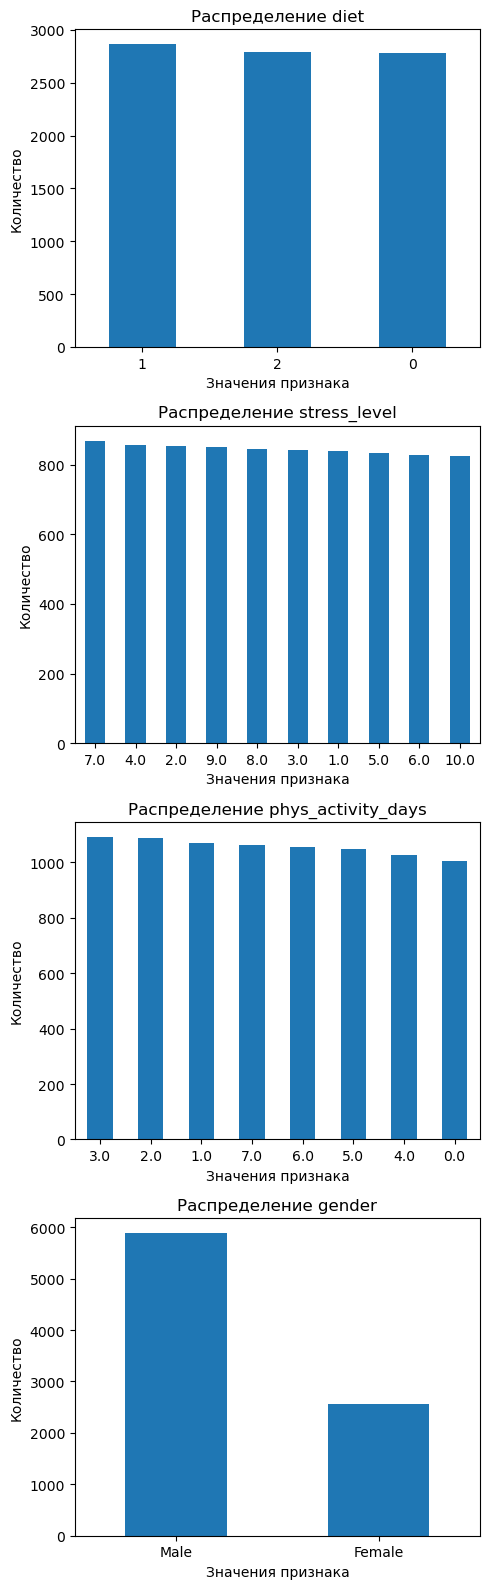

In [43]:
cat_columns = train_data.select_dtypes(include=['category']).columns
# Создаем subplot 
fig, axes = plt.subplots(nrows=len(cat_columns), ncols=1, 
                        figsize=(5, 4*len(cat_columns)))
    
# Если только один столбец, преобразуем axes в массив для единообразия
if len(cat_columns) == 1:
        axes = [axes]
    
# Цикл по категориальным столбцам
for i, col in enumerate(cat_columns):
    # Построение графиков
    train_data[col].value_counts().plot(kind='bar',
                                        ax=axes[i], title=f'Распределение {col}')
    axes[i].set_xlabel('Значения признака')
    axes[i].set_ylabel('Количество')
    axes[i].tick_params(axis='x', rotation=0)
    
# Настройка отображения
plt.tight_layout()
plt.show()

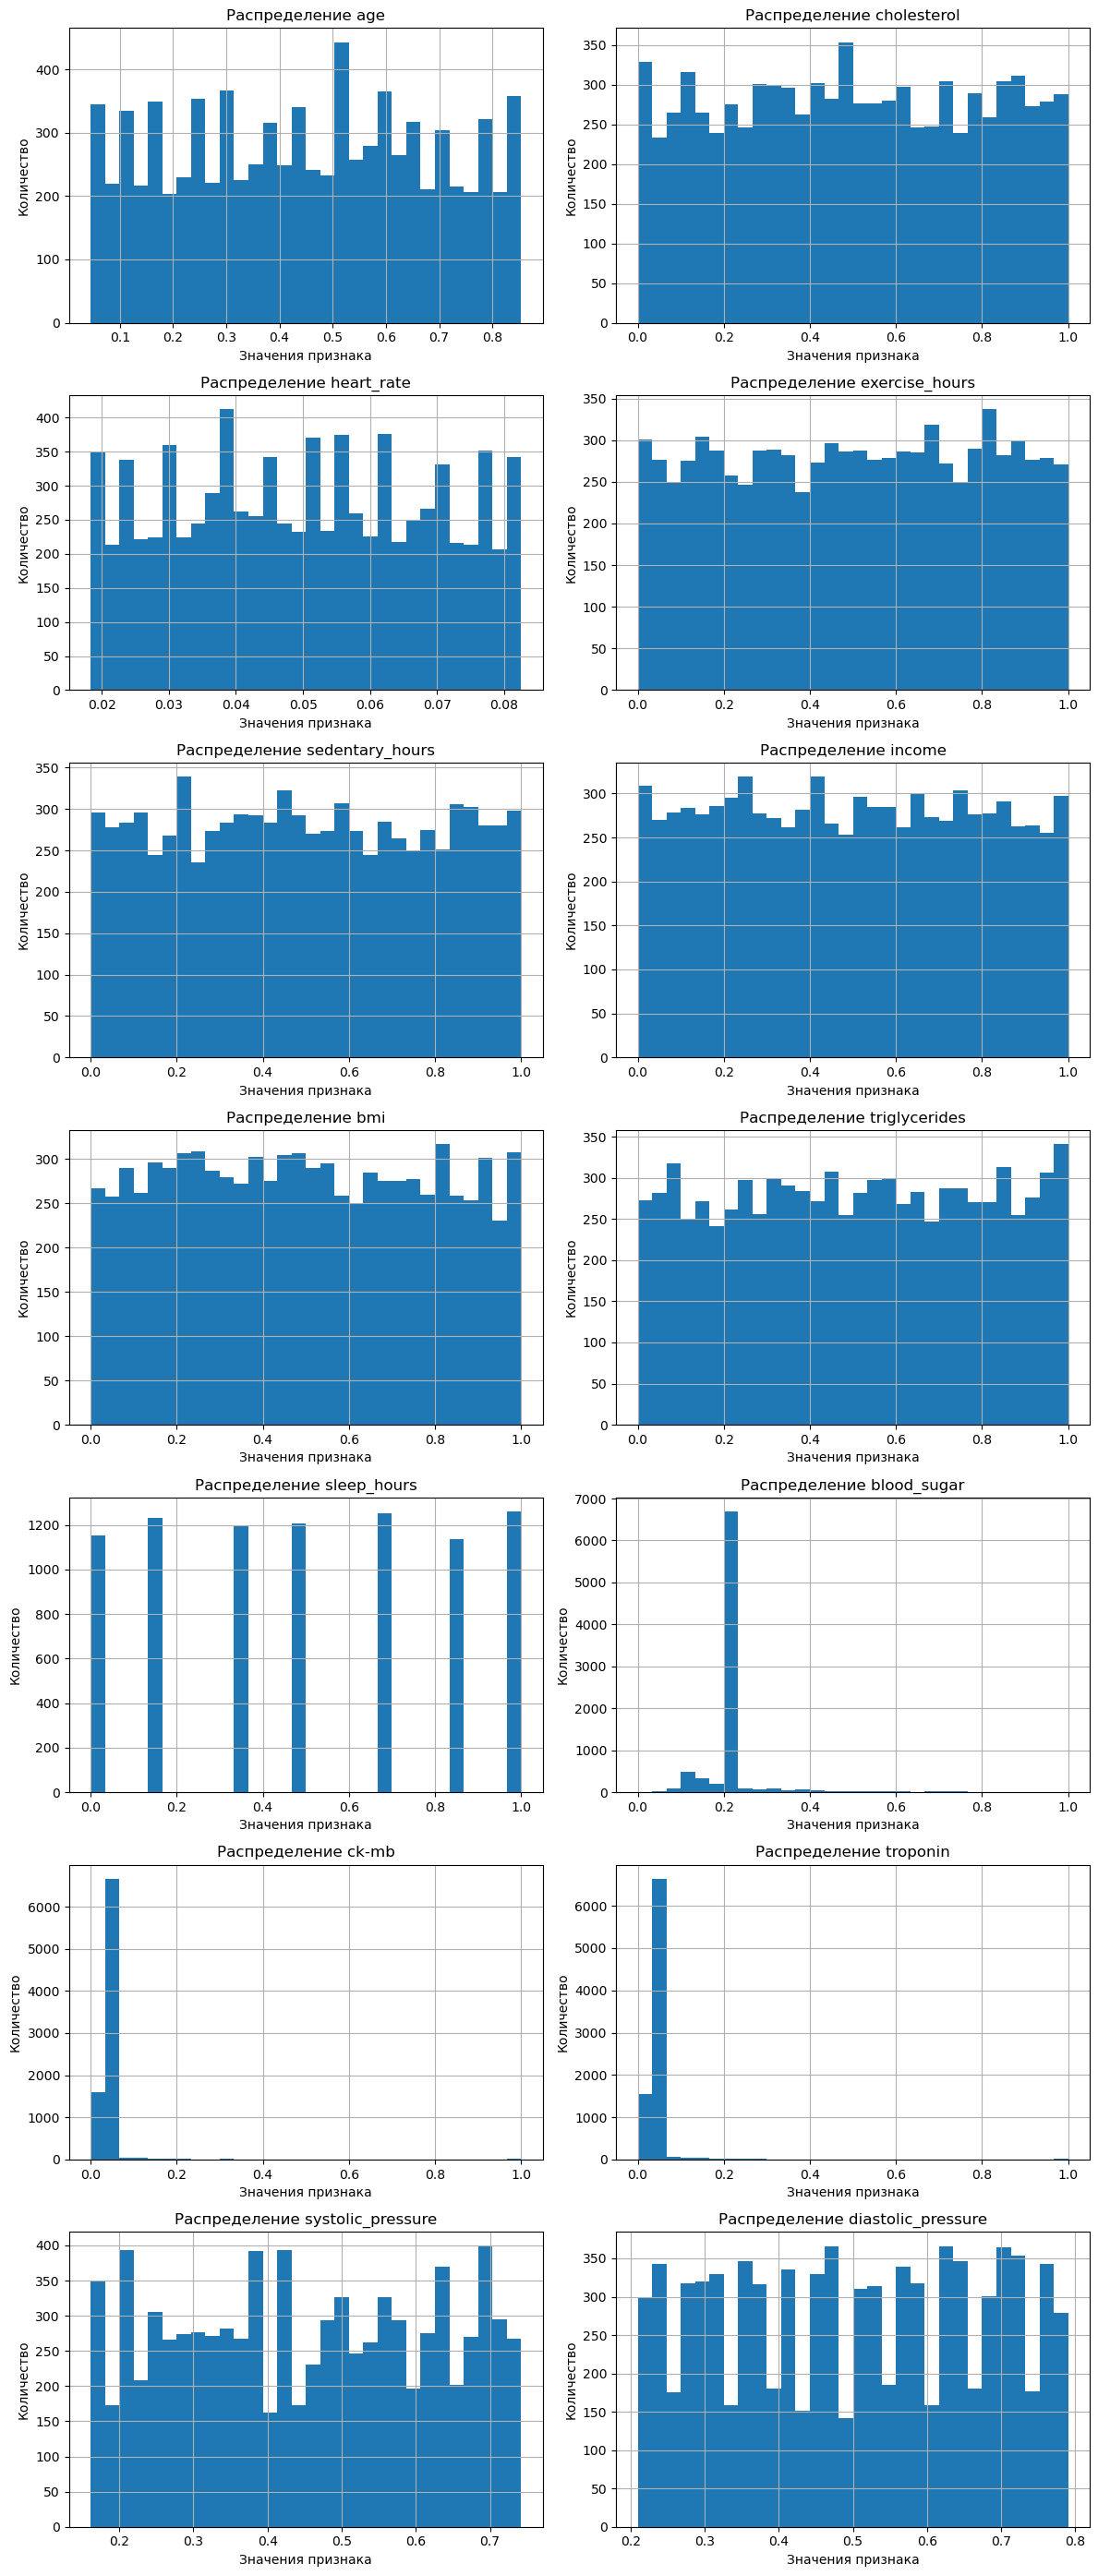

In [44]:
# Выбираем количественные признаки (числовые столбцы)
num_columns = train_data.select_dtypes(include=['int64', 'float64']).columns.drop('id')
# Создам Subplot
n_rows = int(np.ceil(len(num_columns) / 2))
fig, axes = plt.subplots(nrows=n_rows, ncols=2, 
                           figsize=(12, 4*n_rows), squeeze=False)
axes_flat = axes.flatten()
for i, col in enumerate(num_columns):
    # Построение гистограммы
    train_data[col].hist(ax=axes_flat[i], bins=30)
    axes_flat[i].set_title(f'Распределение {col}')
    axes_flat[i].set_xlabel('Значения признака')
    axes_flat[i].set_ylabel('Количество')
    
# Скрываем пустые subplots, если количество признаков нечетное
for j in range(i+1, len(axes_flat)):
    axes_flat[j].axis('off')
    
# Настройка отображения
plt.tight_layout()
plt.show()

По графикам можно наблюдать наличие выбросов, построю ящики с усами.

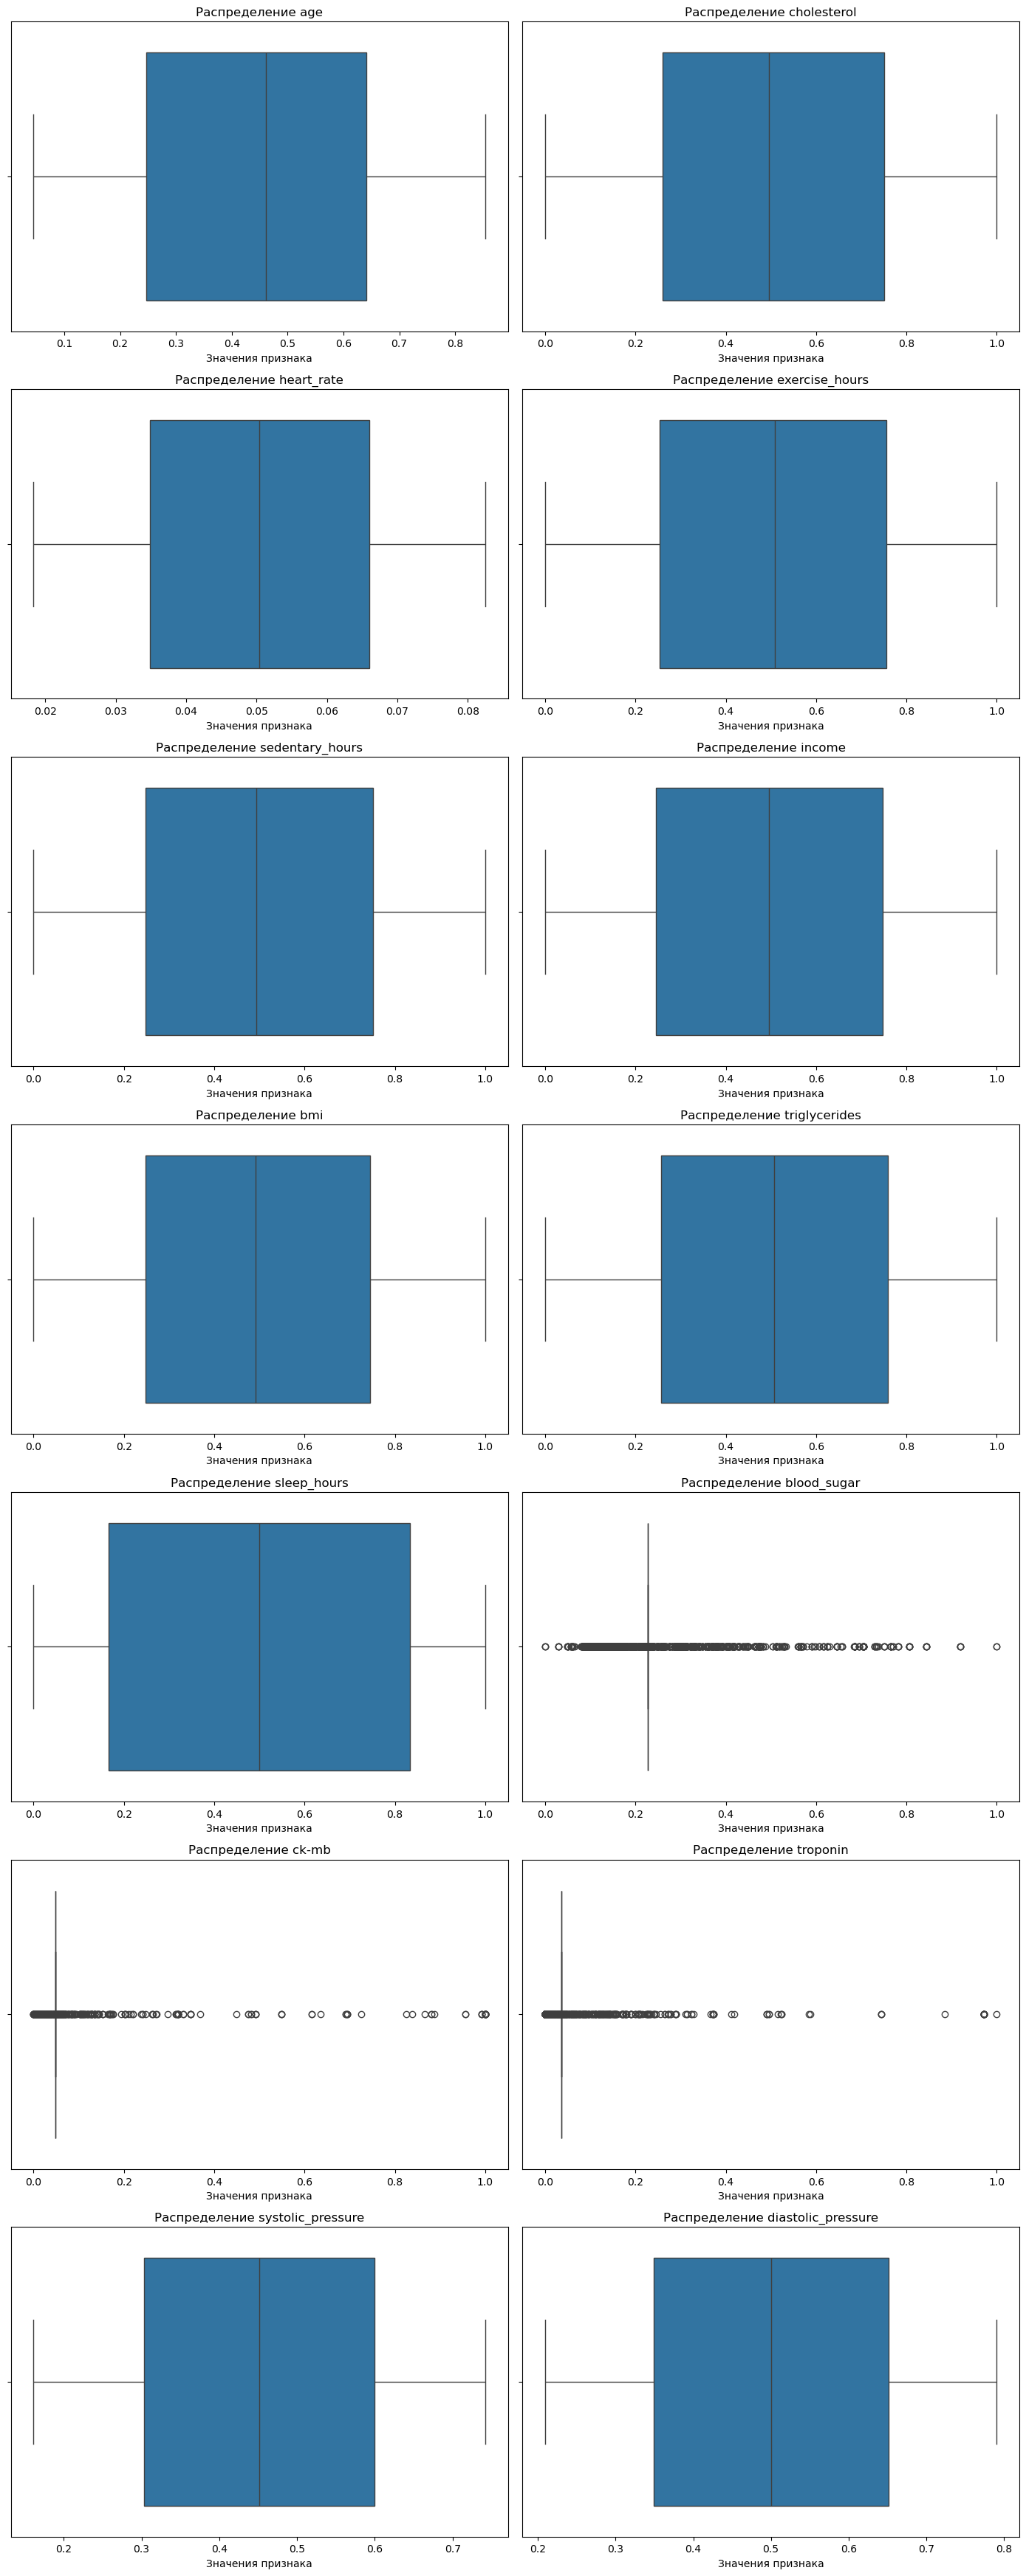

In [46]:
# Создаем subplot с 2 столбцами
fig, axes = plt.subplots(nrows=n_rows, ncols=2, 
                        figsize=(14, 5*n_rows))
    
# Преобразуем оси в плоский массив для удобного перебора
axes = axes.flatten()
    
# Цикл по количественным столбцам
for i, col in enumerate(num_columns):
    # Построение boxplot
    sns.boxplot(x=train_data[col], ax=axes[i])
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel('Значения признака')
        
    # Убираем y-label, так как для boxplot он не информативен
    axes[i].set_ylabel('')
    
# Скрываем пустые subplots, если количество признаков нечетное
for j in range(i+1, len(axes)):
    axes[j].axis('off')
    
# Настройка отображения
plt.tight_layout()
plt.show()

#### Графики для тестовой выборки

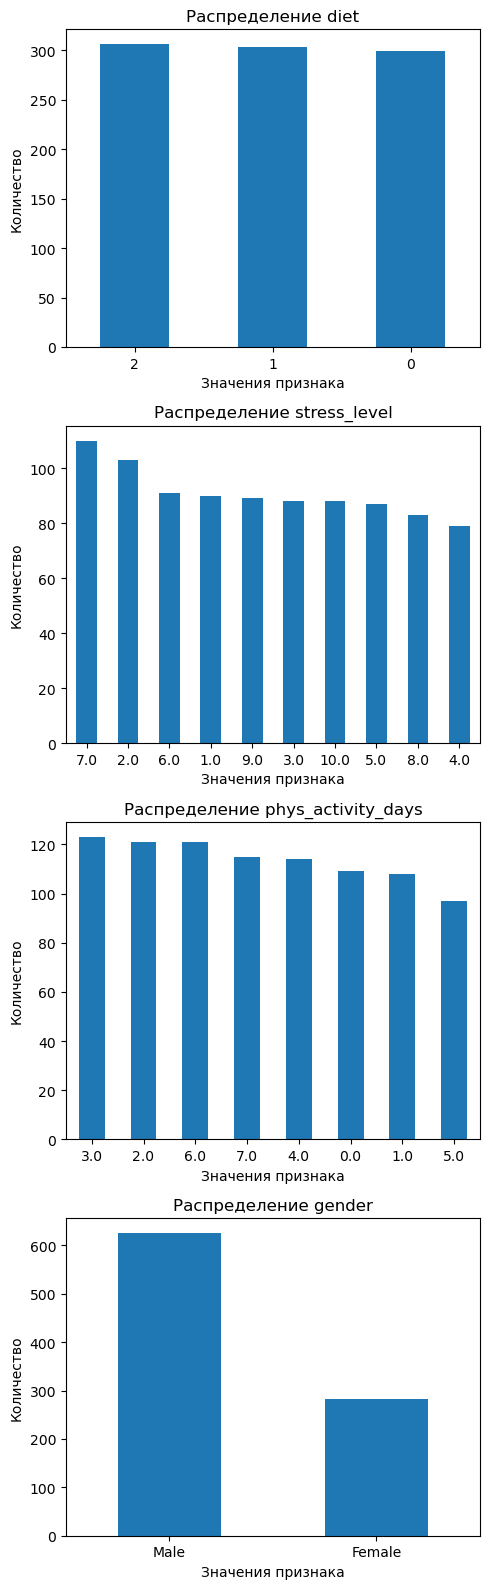

In [48]:
cat_columns = test_data.select_dtypes(include=['category']).columns
# Создаем subplot 
fig, axes = plt.subplots(nrows=len(cat_columns), ncols=1, 
                        figsize=(5, 4*len(cat_columns)))
    
# Если только один столбец, преобразуем axes в массив для единообразия
if len(cat_columns) == 1:
        axes = [axes]
    
# Цикл по категориальным столбцам
for i, col in enumerate(cat_columns):
    # Построение графиков
    test_data[col].value_counts().plot(kind='bar',
                                        ax=axes[i], title=f'Распределение {col}')
    axes[i].set_xlabel('Значения признака')
    axes[i].set_ylabel('Количество')
    axes[i].tick_params(axis='x', rotation=0)
    
# Настройка отображения
plt.tight_layout()
plt.show()

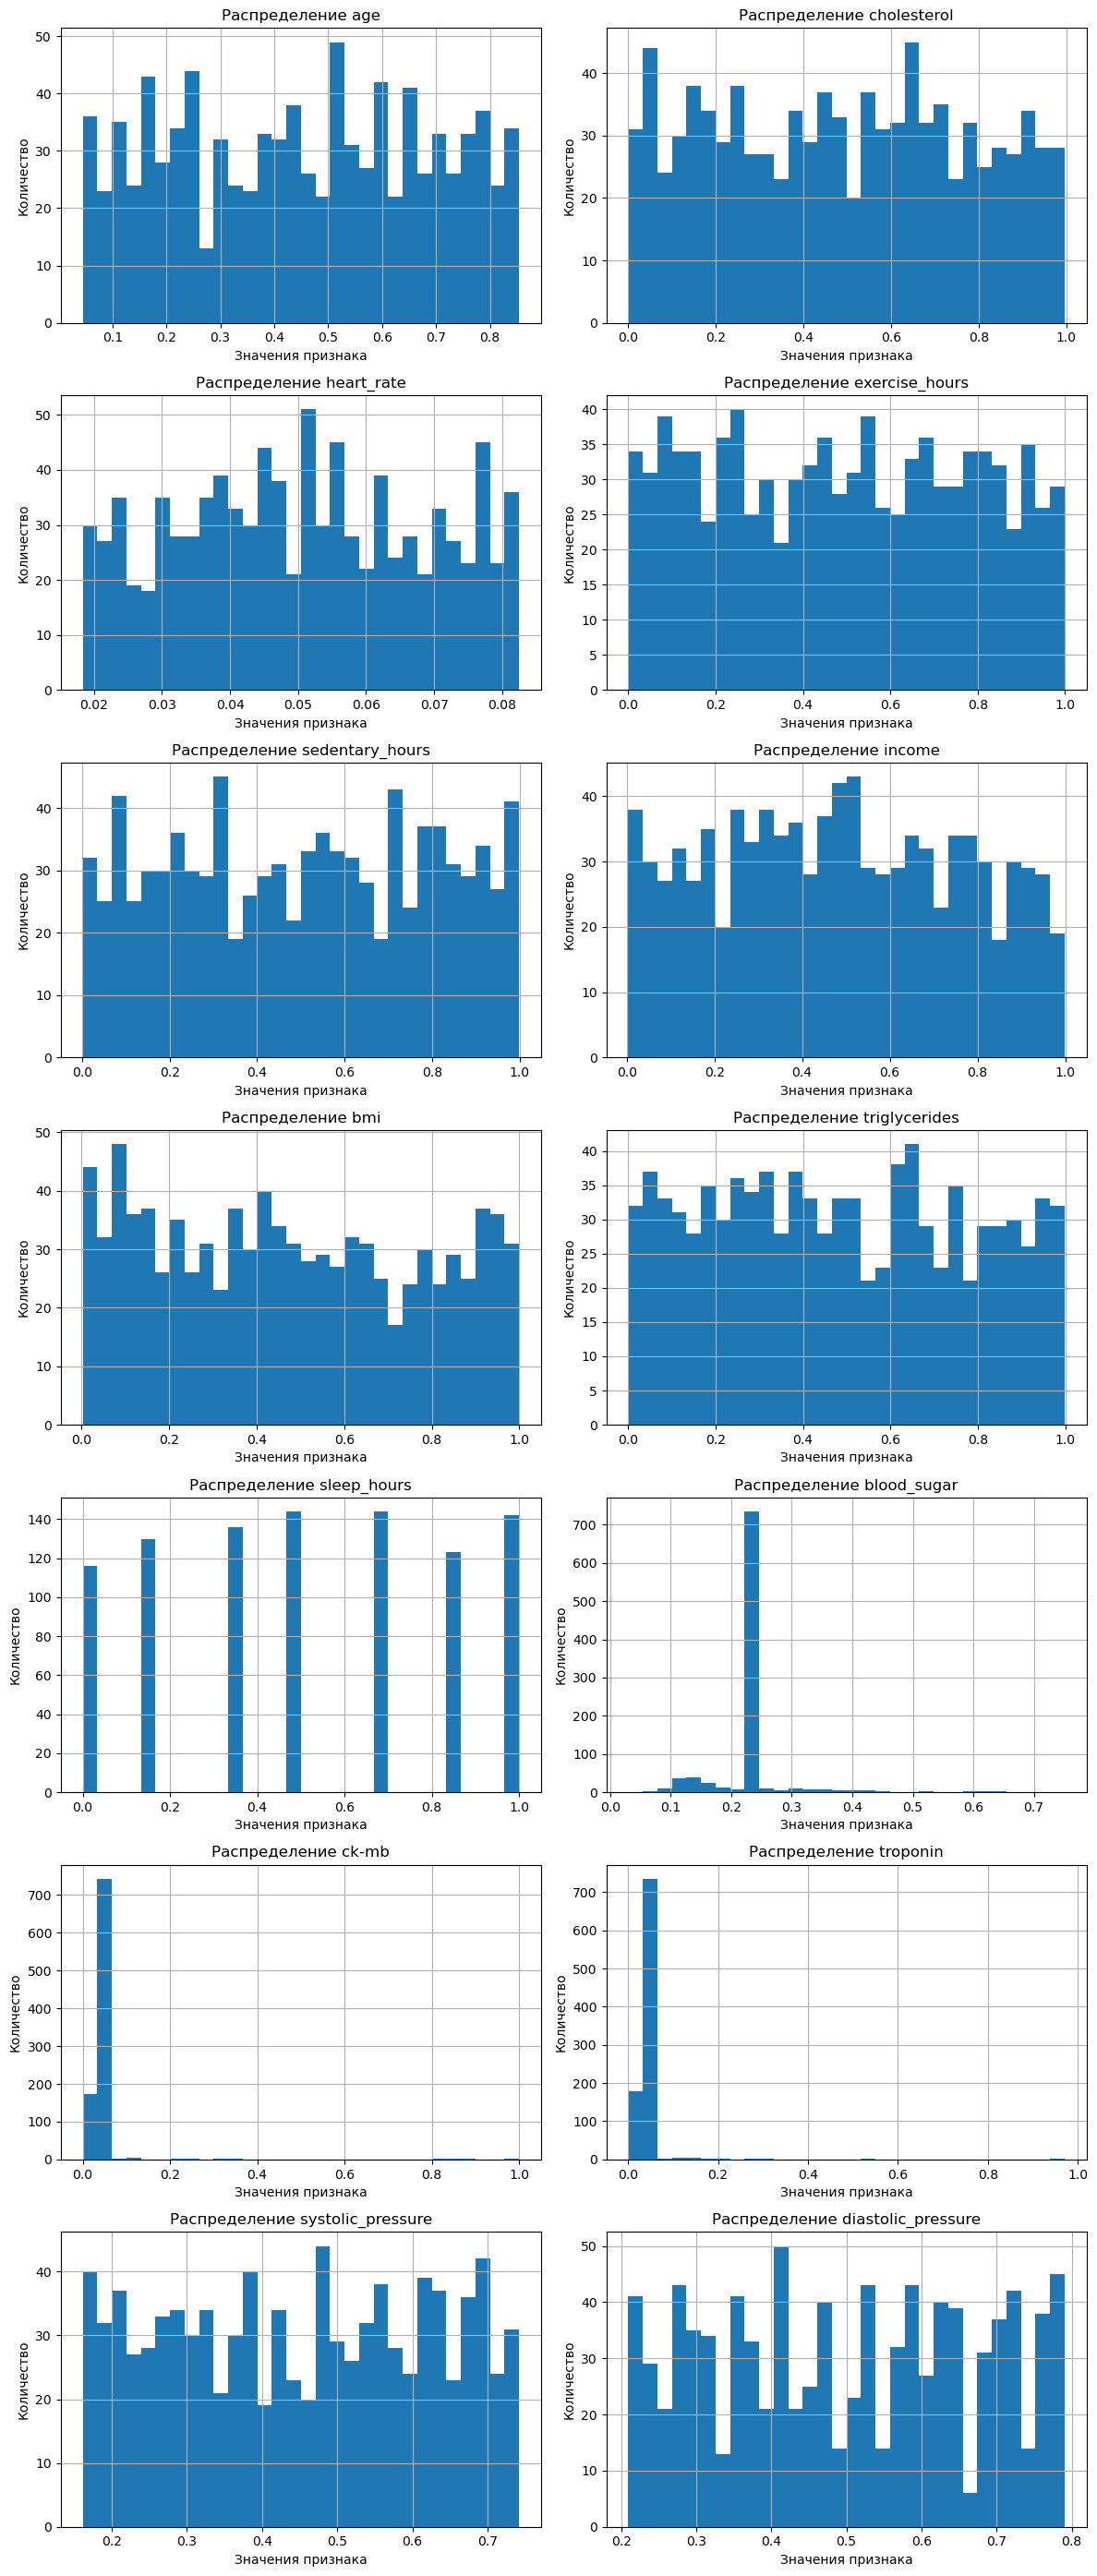

In [49]:
# Выбираем количественные признаки (числовые столбцы)
num_columns = test_data.select_dtypes(include=['int64', 'float64']).columns.drop('id')
# Создам Subplot
n_rows = int(np.ceil(len(num_columns) / 2))
fig, axes = plt.subplots(nrows=n_rows, ncols=2, 
                           figsize=(12, 4*n_rows), squeeze=False)
axes_flat = axes.flatten()
for i, col in enumerate(num_columns):
    # Построение гистограммы
    test_data[col].hist(ax=axes_flat[i], bins=30)
    axes_flat[i].set_title(f'Распределение {col}')
    axes_flat[i].set_xlabel('Значения признака')
    axes_flat[i].set_ylabel('Количество')
    
# Скрываем пустые subplots, если количество признаков нечетное
for j in range(i+1, len(axes_flat)):
    axes_flat[j].axis('off')
    
# Настройка отображения
plt.tight_layout()
plt.show()

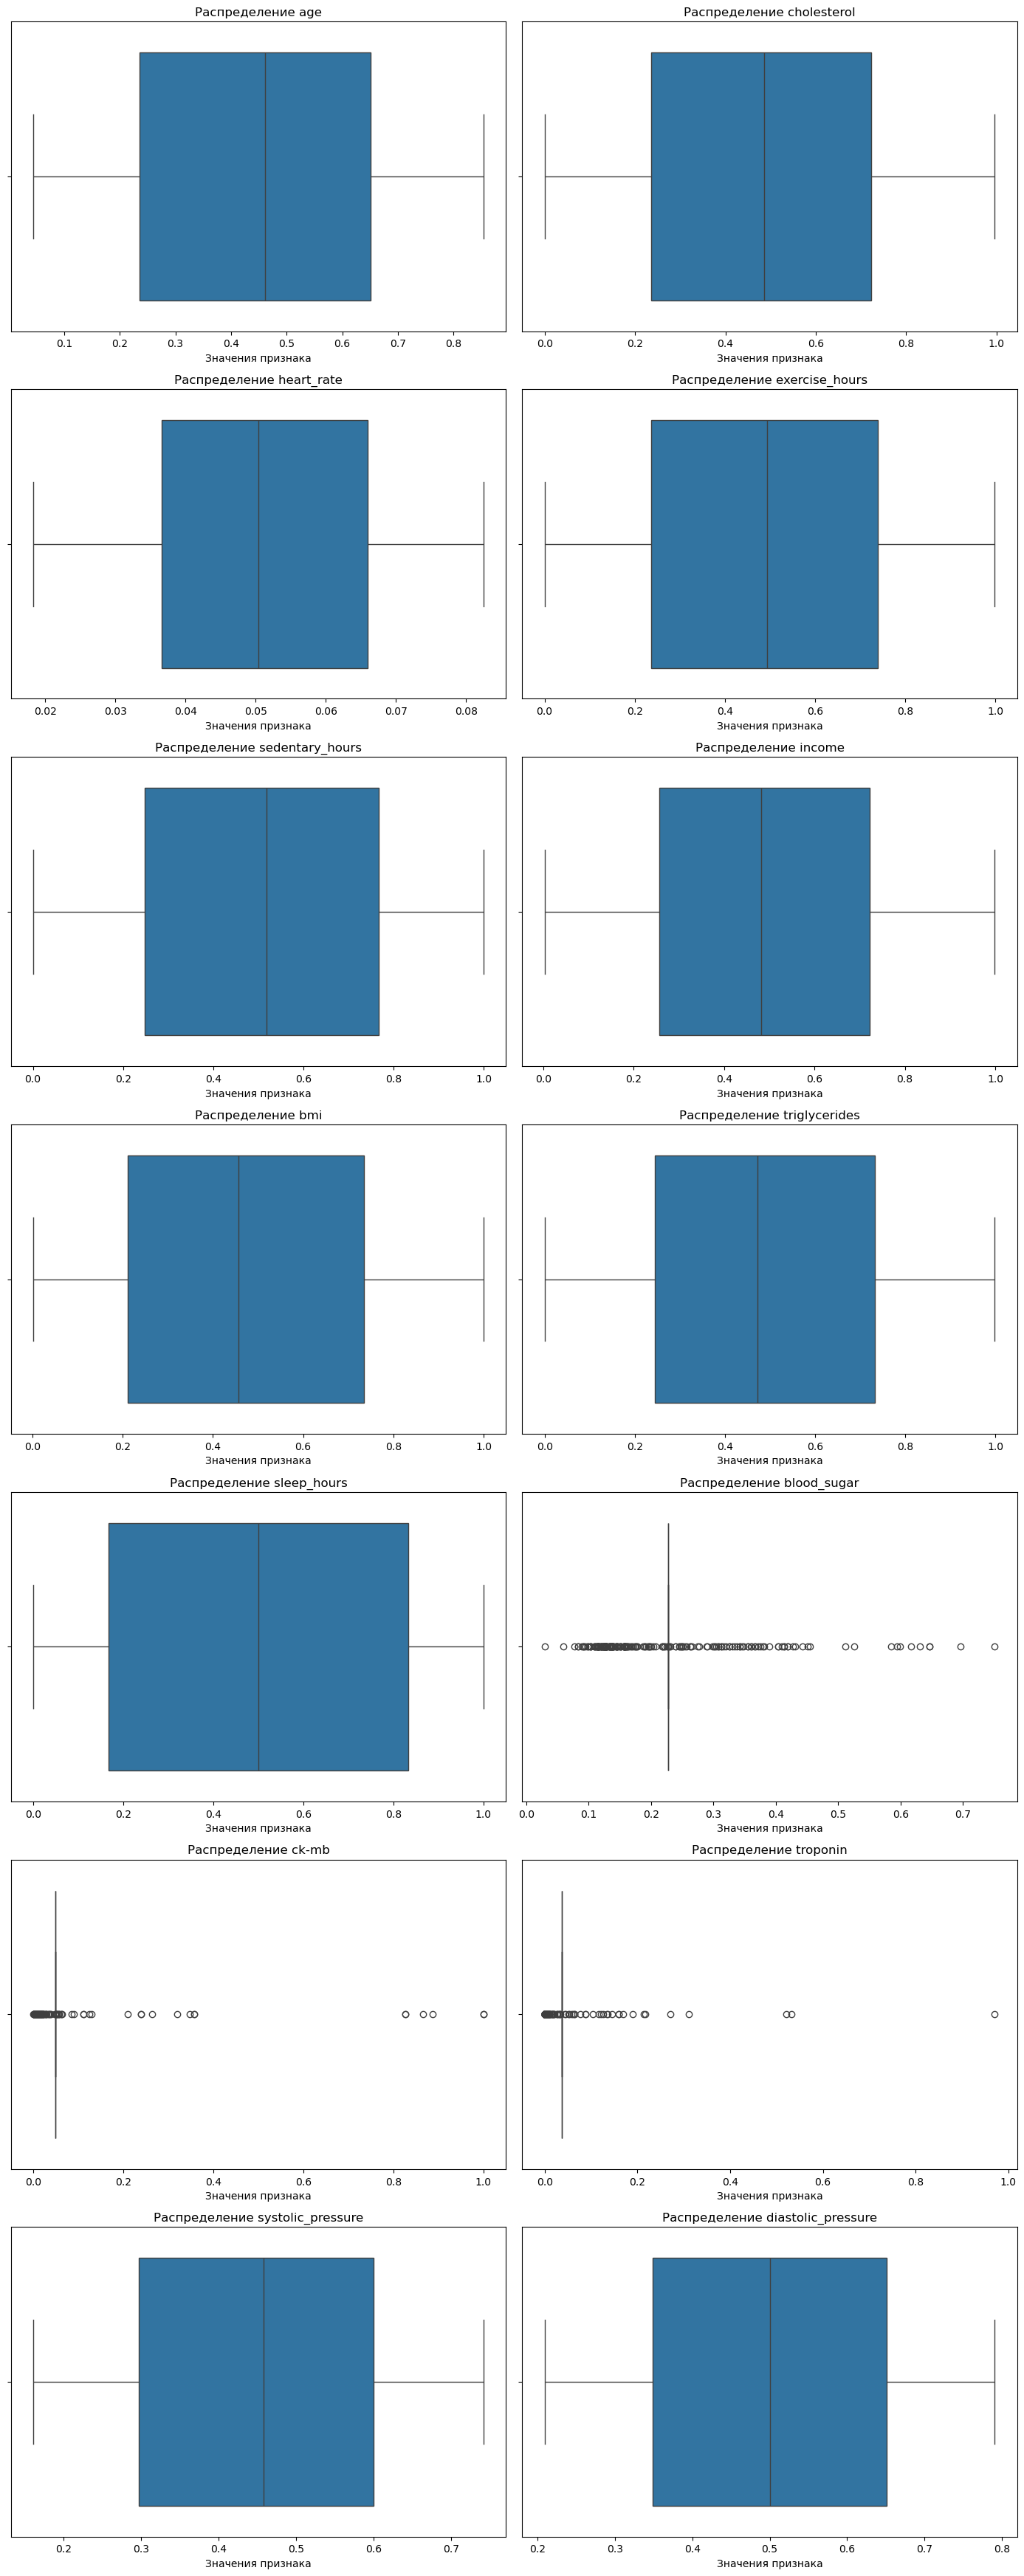

In [50]:
# Создаем subplot с 2 столбцами
fig, axes = plt.subplots(nrows=n_rows, ncols=2, 
                        figsize=(14, 5*n_rows))
    
# Преобразуем оси в плоский массив для удобного перебора
axes = axes.flatten()
    
# Цикл по количественным столбцам
for i, col in enumerate(num_columns):
    # Построение boxplot
    sns.boxplot(x=test_data[col], ax=axes[i])
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel('Значения признака')
        
    # Убираем y-label, так как для boxplot он не информативен
    axes[i].set_ylabel('')
    
# Скрываем пустые subplots, если количество признаков нечетное
for j in range(i+1, len(axes)):
    axes[j].axis('off')
    
# Настройка отображения
plt.tight_layout()
plt.show()

Из-за подозрений на наличие нелинейных связей, использую phik для построения корреляционной матрицы

In [52]:
interval_cols = ['age', 'cholesterol', 'heart_rate', 'exercise_hours',
                'sedentary_hours', 'income', 'bmi', 'triglycerides',
                'sleep_hours', 'blood_sugar', 'systolic_pressure',
                'diastolic_pressure']

In [53]:
corr_matrix_train = train_data.drop('id', axis=1).phik_matrix(interval_cols=interval_cols).round(2)

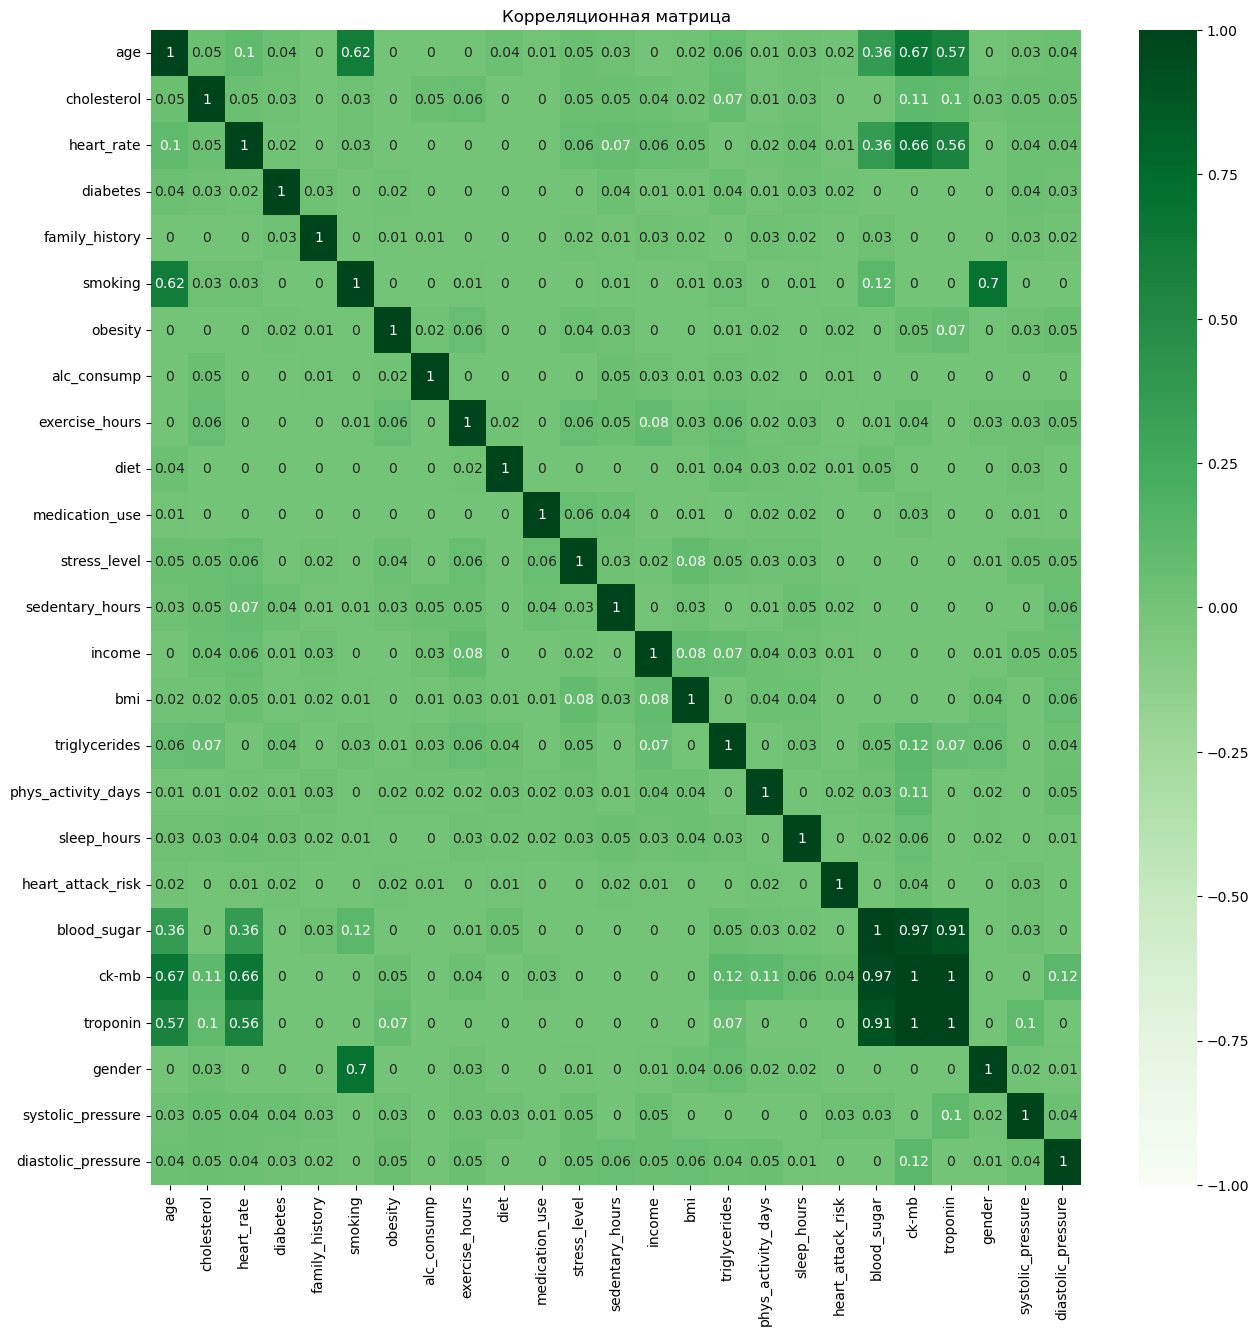

In [54]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix_train, annot=True, vmin=-1, vmax=1, cmap="Greens")
plt.title('Корреляционная матрица')
plt.show()

In [55]:
corr_matrix_test = test_data.drop('id', axis=1).phik_matrix(interval_cols=interval_cols).round(2)

По корреляционным матрицам можно заметить высокую корреляцию между сахаром в крови, тропинином и креатинфосфокиназой. Так как креатинфосфокиназа является изоферментом, выделяющимся при разрушении клеток, его редко рассматривают в качестве показателя риска инфаркта. Уровень сахара в крови весьма переменчивый показатель, подскочивший в моменте сахар не повышает риск сердечного приступа. Из этих трех показателей наиболее специфичным в диагностике риска инфаркта является тропинин, поэтому оставлю его. Также стоит убрать выбросы данного показателя. 

In [57]:
train_data = train_data.drop(columns = ['blood_sugar','ck-mb','diastolic_pressure','gender','exercise_hours','stress_level'])

In [58]:
test_data = test_data.drop(columns = ['blood_sugar','ck-mb'])

In [59]:
train_data = train_data[train_data['troponin'] <= 0.7]

In [60]:
test_data = test_data[test_data['troponin'] <= 0.4]

In [61]:
train_data.duplicated().sum()

0

In [62]:
corr_matrix_train = train_data.drop('id', axis=1).phik_matrix(interval_cols=interval_cols).round(2)

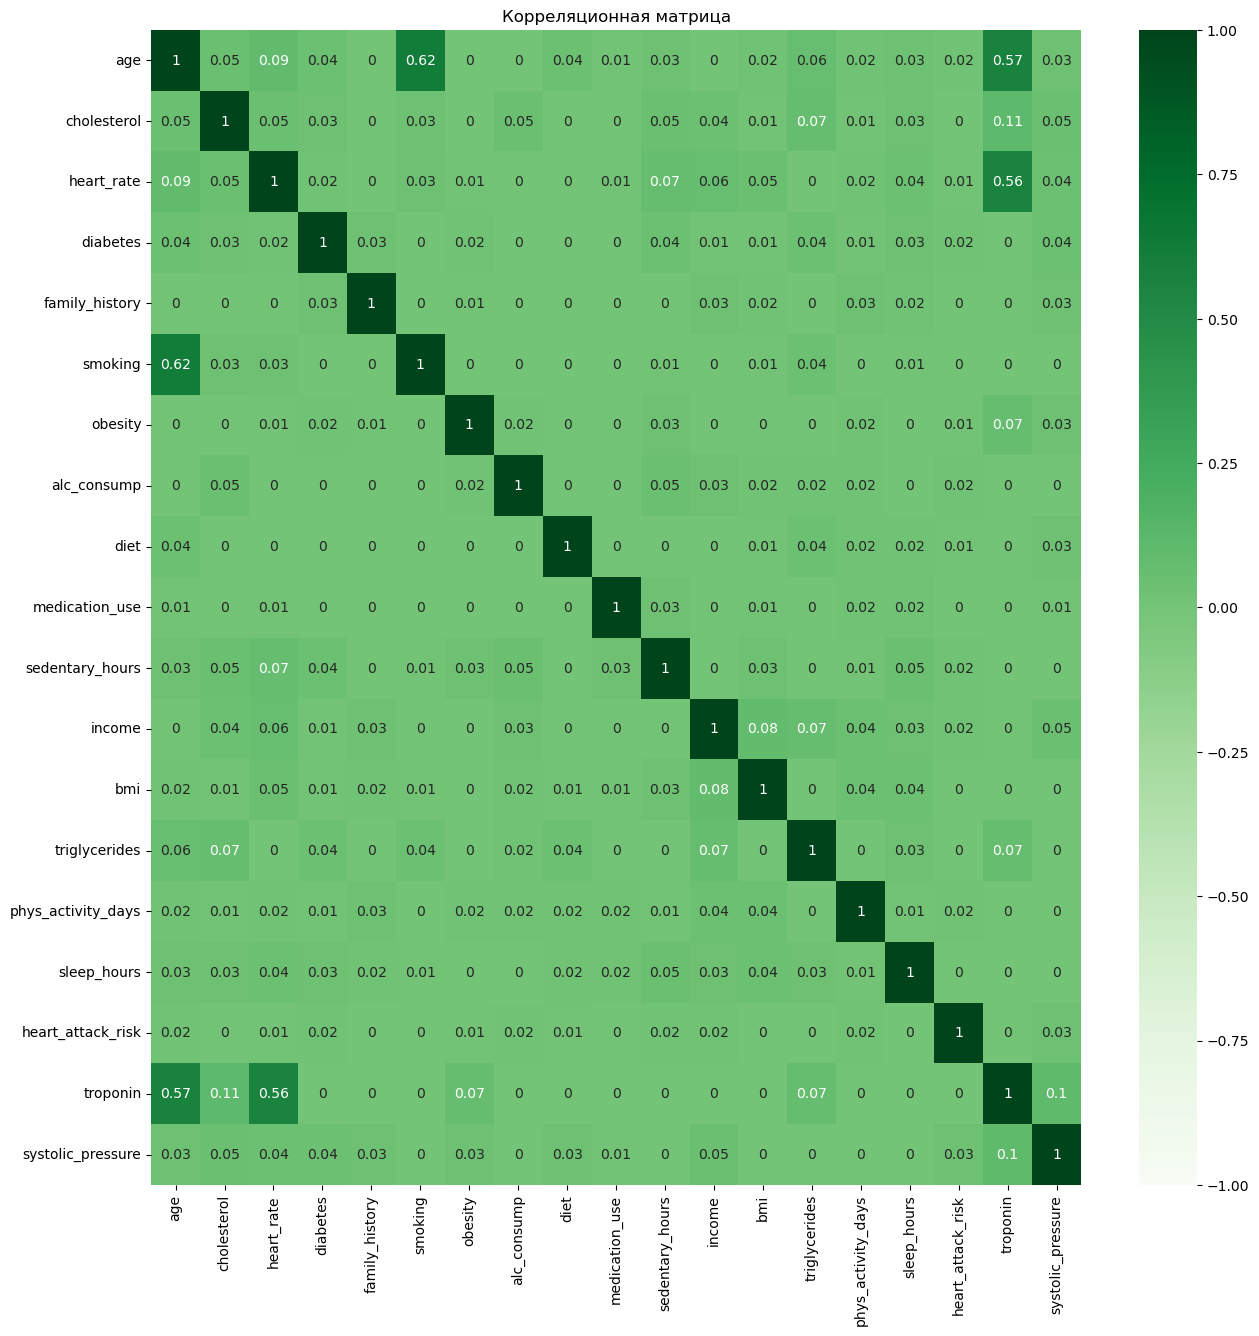

In [63]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix_train, annot=True, vmin=-1, vmax=1, cmap="Greens")
plt.title('Корреляционная матрица')
plt.show()

In [64]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8417 entries, 0 to 8684
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 8417 non-null   float64 
 1   cholesterol         8417 non-null   float64 
 2   heart_rate          8417 non-null   float64 
 3   diabetes            8417 non-null   bool    
 4   family_history      8417 non-null   bool    
 5   smoking             8417 non-null   bool    
 6   obesity             8417 non-null   bool    
 7   alc_consump         8417 non-null   bool    
 8   diet                8417 non-null   category
 9   medication_use      8417 non-null   bool    
 10  sedentary_hours     8417 non-null   float64 
 11  income              8417 non-null   float64 
 12  bmi                 8417 non-null   float64 
 13  triglycerides       8417 non-null   float64 
 14  phys_activity_days  8417 non-null   category
 15  sleep_hours         8417 non-null   float64

## Подготовка данных

In [66]:
train_data = train_data.drop('id',axis = 1)

In [67]:
train_data.duplicated().sum()

26

In [68]:
train_data.drop_duplicates(inplace = True)

In [69]:
X = train_data.drop('heart_attack_risk', axis=1)
y = train_data['heart_attack_risk']

In [70]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

### Препроцессинг

In [72]:
num_columns = ['age','cholesterol','heart_rate','sedentary_hours','income', 
'bmi','triglycerides', 'sleep_hours', 'troponin', 'systolic_pressure']
ohe_num_columns = ['diet', 'phys_activity_days']

In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8391 entries, 0 to 8684
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 8391 non-null   float64 
 1   cholesterol         8391 non-null   float64 
 2   heart_rate          8391 non-null   float64 
 3   diabetes            8391 non-null   bool    
 4   family_history      8391 non-null   bool    
 5   smoking             8391 non-null   bool    
 6   obesity             8391 non-null   bool    
 7   alc_consump         8391 non-null   bool    
 8   diet                8391 non-null   category
 9   medication_use      8391 non-null   bool    
 10  sedentary_hours     8391 non-null   float64 
 11  income              8391 non-null   float64 
 12  bmi                 8391 non-null   float64 
 13  triglycerides       8391 non-null   float64 
 14  phys_activity_days  8391 non-null   category
 15  sleep_hours         8391 non-null   float64

In [74]:
# Пайплайн для OHE-признаков
ohe_num_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [75]:
# Пайплайн для числовых признаков
numeric_transformer = Pipeline([
    ('simpleImputer_num', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [76]:
# Объединяем все преобразования в ColumnTransformer
data_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('ohe_num', ohe_num_transformer, ohe_num_columns)
        # Булевы колонки передаются как есть
    ],
    remainder='passthrough'
)

In [77]:
# Создаем итоговый пайплайн
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('classifier', LogisticRegression())
])

In [78]:
# Определяем модели и параметры
param_grid = [
    {
        'classifier': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear')],
        'classifier__C': np.logspace(-3, 3, 20),
        'classifier__penalty': ['l1', 'l2'], 
        'classifier__class_weight': ['balanced', None],
        'preprocessor__num__simpleImputer_num__strategy': ['mean', 'median']
    },
    {
        'classifier': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'classifier__n_estimators': [100, 150, 200, 500],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__class_weight': ['balanced', None],
        'preprocessor__num__simpleImputer_num__strategy': ['mean', 'median']
    },
    {
        'classifier': [CatBoostClassifier(verbose=0, random_state=RANDOM_STATE, auto_class_weights='Balanced')],
        'classifier__iterations': [500, 1000],
        'classifier__learning_rate': [0.01, 0.05],
        'classifier__depth': [2, 4, 6, 8, 10],
        'preprocessor__num__simpleImputer_num__strategy': ['mean', 'median']
    }
]

In [79]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=2,
    random_state=RANDOM_STATE,
    error_score='raise'
)


In [80]:
random_search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,estimator,Pipeline(step...egression())])
,param_distributions,"[{'classifier': [LogisticRegre...r='liblinear')], 'classifier__C': array([1.0000...00000000e+03]), 'classifier__class_weight': ['balanced', None], 'classifier__penalty': ['l1', 'l2'], ...}, {'classifier': [RandomForestC...om_state=1202)], 'classifier__class_weight': ['balanced', None], 'classifier__max_depth': [None, 10, ...], 'classifier__min_samples_split': [2, 5, ...], ...}, ...]"
,n_iter,50
,scoring,'roc_auc'
,n_jobs,2
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,1202
,error_score,'raise'


In [81]:
# 1. Получаем предсказания вероятностей и классов
y_proba = random_search.predict_proba(X_val)[:, 1]  # Вероятности класса 1
y_pred = random_search.predict(X_val)               # Классы (по умолчанию порог 0.5)

# 2. Вычисляем метрики
roc_auc = roc_auc_score(y_val, y_proba)
f2_score = fbeta_score(y_val, y_pred, beta=2)  # beta=2 делает акцент на Recall

# 3. Выводим результаты
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"F2-Score: {f2_score:.4f}\n")

# 4. Детальный отчет (дополнительно)
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

ROC-AUC: 0.5597
F2-Score: 0.1010

Classification Report:
              precision    recall  f1-score   support

       False       0.66      0.97      0.78      1620
        True       0.62      0.08      0.15       898

    accuracy                           0.66      2518
   macro avg       0.64      0.53      0.47      2518
weighted avg       0.65      0.66      0.56      2518

Confusion Matrix:
[[1575   45]
 [ 823   75]]


In [82]:
best_pipeline = random_search.best_estimator_

In [169]:
import os
import joblib
from pathlib import Path

# Путь относительно корня проекта
project_root = Path.cwd()
save_path = project_root / "heart_risk_prediction" / "models" / "model.joblib"

# Сохраняем модель
joblib.dump(best_pipeline, save_path)
print(f"Модель сохранена в: {save_path}")

Модель сохранена в: /Users/gadzhi/heart_risk_prediction/models/model.joblib


In [84]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 932 entries, 0 to 965
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 932 non-null    float64 
 1   cholesterol         932 non-null    float64 
 2   heart_rate          932 non-null    float64 
 3   diabetes            932 non-null    bool    
 4   family_history      932 non-null    bool    
 5   smoking             932 non-null    bool    
 6   obesity             932 non-null    bool    
 7   alc_consump         932 non-null    bool    
 8   exercise_hours      932 non-null    float64 
 9   diet                905 non-null    category
 10  medication_use      932 non-null    bool    
 11  stress_level        905 non-null    category
 12  sedentary_hours     932 non-null    float64 
 13  income              932 non-null    float64 
 14  bmi                 932 non-null    float64 
 15  triglycerides       932 non-null    float64 


In [85]:
test_data = test_data.drop(columns = ['diastolic_pressure','gender','exercise_hours','stress_level'])

In [86]:
test_ids = test_data["id"]

In [87]:
test_data.duplicated().sum()

0

In [88]:
predictions = best_pipeline.predict(test_data.drop("id", axis=1))

In [89]:
results = pd.DataFrame({
    "id": test_ids,
    "prediction": predictions
})

In [90]:
results.to_csv("heart_risk_prediction/predictions.csv", index=False)